## Constrained multiobjective optimization using MOBO


In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline


from xopt.bayesian.algorithms import mobo
from botorch.utils.multi_objective.pareto import is_non_dominated

import os
SMOKE_TEST = os.environ.get('SMOKE_TEST')

# test function
from xopt.tests.evaluators import TNK

In [2]:
# To see log messages
from xopt import output_notebook
output_notebook()

In [ ]:
# Get VOCS
VOCS = TNK.VOCS
VOCS

{'name': 'TNK_test',
 'description': 'Constrainted test function TNK. See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf',
 'simulation': 'test_TNK',
 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]},
 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'},
 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]},
 'constants': {'a': 'dummy_constant'}}

In [6]:
# add reference point
ref = [1.4, 1.4]

# Get evaluate function
EVALUATE = TNK.evaluate_TNK
n_steps = 30

gen_options = {'batch_size':4,                      ## Specify batched mobo
               'use_gpu':False,                     ## Use GPU
              }

if SMOKE_TEST:
    n_steps = 3
    gen_options['batch_size'] = 1
    #gen_options['num_restarts'] = 2
    #gen_options['raw_samples'] = 2

## Run the optimization

In [8]:
%%time
results = mobo(VOCS, EVALUATE,
               ref = ref,
               generator_options = gen_options,
               n_initial_samples=20,                   ## Specify number of initial
               # random samples
               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
               n_steps=n_steps,                       ## number of optimization step
               # restart_data_file = 'results.json',  ## restart optimization file
               # custom_model = myCustomModel,        ## Specify custom model creation function (see examples/bayes_exp/serial_nans.ipynb)
              )

started running optimization with generator: <xopt.bayesian.generators.mobo.MOBOGenerator object at 0x1036b9e50>
submitting initial candidates
starting optimization loop
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates


/Users/chrisonian/Code/miniconda3/envs/xopt-dev/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)
/Users/chrisonian/Code/miniconda3/envs/xopt-dev/lib/python3.9/site-packages/gpytorch/utils/cholesky.py:44: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


submitting candidates
submitting candidates
submitting candidates
CPU times: user 54min 12s, sys: 2min 53s, total: 57min 6s
Wall time: 14min 53s


# Plot 

dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraint_status', 'feasibility', 'model', 'constraints', 'corrected_constraints'])


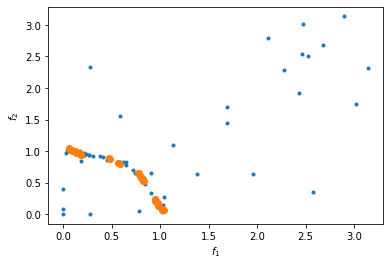

In [9]:
fig, ax = plt.subplots()
print(results.keys())
train_y = results['objectives']
valid_y = train_y[results['feasibility'].flatten()]
ax.plot(train_y[:, 0], train_y[:, 1], '.')
ax.set_ylabel('$f_2$')
ax.set_xlabel('$f_1$')

# highlight Pareto front, ONLY using valid observations (note botorch assumes maximization when determing dominant points)
non_dom = is_non_dominated(-valid_y)
ax.plot(valid_y[:,0][non_dom],valid_y[:,1][non_dom],'C1o')

In [10]:
# Cleanup
!rm results.json